## Adjacency Matrices
This Jupyter Notebook generates an adjacency matrix of a graph with TM stations
<p>
Inputs: <br>
1. TM Stations Shapefile (point vector) - Taken from Datos Abiertos Transmilenio <br>
2. Edges.csv - This file connects the nodes of TM stations
</p>


In [23]:
import pandas as pd
import os
import logging
#import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx

In [19]:
#Read file with TM stations & create a data frame 't' (location, station name, etc.)
estaciones=pd.read_csv('Estaciones_Troncales_de_TRANSMILENIO.csv')
t=estaciones.sort_values(by='numero_estacion',ascending=True)

In [18]:
#Create df from csv file with the edges of the graph
E=pd.read_csv('Edges.csv')

#Create empty graph
G=nx.Graph()

#Create dictionary with the positions of the nodes (stations)
pos= dict([(i,[a,b]) for i, a,b in zip(t.numero_estacion, t.X,t.Y)])

#Add nodes to the existing graph
G.add_nodes_from(pos.keys())

#Add edges to the existing graph
for i, elrow in E.iterrows():
    G.add_edge(elrow[0], elrow[1])

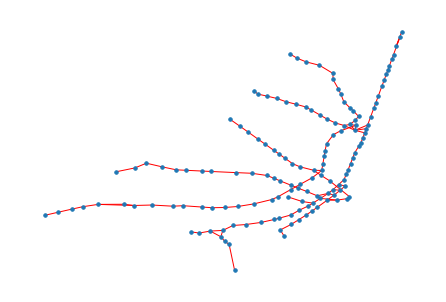

In [9]:
#Draw graph
nx.draw(G, pos, with_labels=False, edge_color='red', node_size=12, font_size=8)
plt.show()

In [11]:
#Creates adjacency matrix 
M = nx.adjacency_matrix(G)
print(M.todense())
type(M)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


C:\Users\jrodo\AppData\Local\Temp\ipykernel_792\2815746273.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M = nx.adjacency_matrix(G)


scipy.sparse._csr.csr_matrix